# Overview of Image-Based Invasion Percolation


```{post} 2021-06-05
:tags: porespy
:redirect: porespy-ibip-intro
```

The PMEAL team, in collaboration with researchers from Queen Mary University in London, have written a new algorithm for simulating fluid invasion into tomograms.  This image-based approach is complementary to the widely used "morphological image openning" or "full morphology" approaches.  The existing approaches are equivalent to increasing the applied pressure and tracking the invaded volume, while our new approach is equivalent to increasing the invaded volume and monitoring the pressure.  

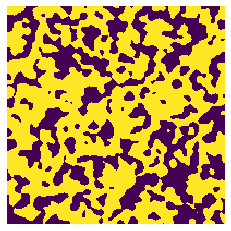

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np
im = ps.generators.blobs([200, 200], blobiness=2, porosity=0.6)
plt.imshow(im, interpolation='none')
plt.axis(False);

To perform the invasion we first define a boundary, in the form of a binary image with ``True`` indicating the starting points.  Let's use the left edge:

In [2]:
bd = np.zeros_like(im)
bd[:, 0] = True

Now we can call the ``ibip`` function:

In [3]:
inv_sat, inv_size = ps.filters.ibip(im=im, inlets=bd, return_sizes=True)

  0%|          | 0/9999 [00:00<?, ?it/s]

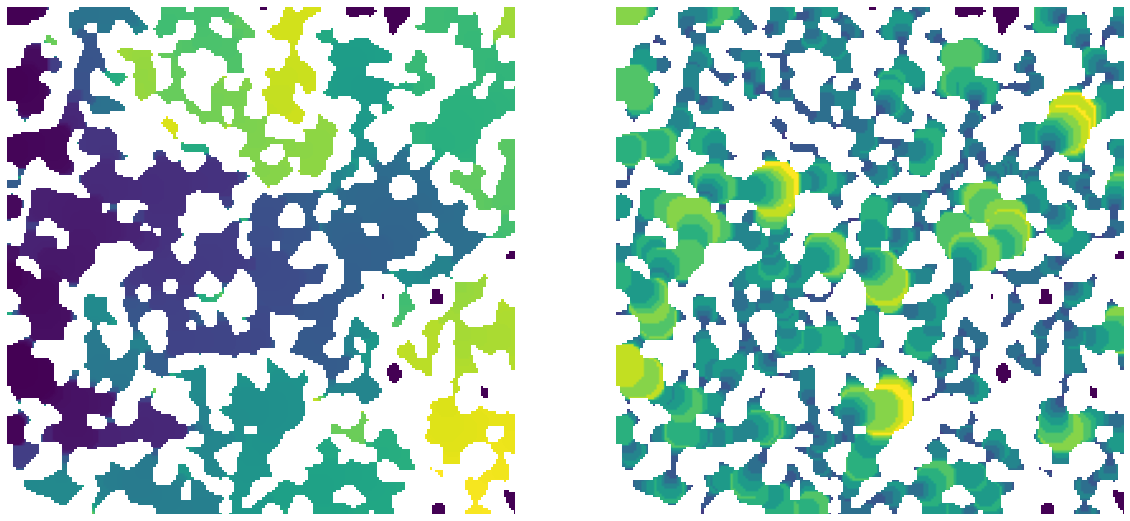

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[20, 20])
ax[0].imshow(inv_sat/im)
ax[0].axis(False)
ax[1].imshow(inv_size/im)
ax[1].axis(False);

The colormap of the left image corresponds to saturation, so applying a threshold at 0.5 will return the fluid configuraiton corresponding to an invading fluid saturation of 0.5.  The color on the right corresponds to the size of the meniscus being inserted at each step. 